## 1)Loading input data
We will use placeholder for this sample

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

#download mnist dataset
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

#create a placeholder with two dimension
#the first one is yet unknown the second one is the number of features in mnist i.e. 28x28 image
x = tf.placeholder(tf.float32, [None,784])

#create a placeholder for the labels
y = tf.placeholder(tf.int64, [None,10])

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## 2)Model Definition
Softmax Regressor

In [2]:
#define variables
W = tf.Variable(tf.zeros([784,10])) #784 inputs, 10 nodes as output => 1 vs all classification
b = tf.Variable(tf.zeros([10]))

#model prediction
prediction_logits = tf.matmul(x,W)+b
prediction = tf.nn.softmax(prediction_logits)

2 layer neural network

In [3]:
W_1 = tf.get_variable("w_1",shape=[784,50],initializer=tf.contrib.layers.xavier_initializer())  #784 inputs, 50 nodes as output => 50 hidden units
b_1 = tf.get_variable("b_1",shape=[50],initializer=tf.random_uniform_initializer(-0.5,0.5))

#fully connected layer 1
fc1 = tf.nn.relu(tf.matmul(x,W_1)+b_1)  #relu activation

W_2 = tf.get_variable("w_2",shape=[50,10],initializer=tf.contrib.layers.xavier_initializer())
b_2 = tf.get_variable("b_2",shape=[10],initializer=tf.random_uniform_initializer(-0.5,0.5))

#model prediction
prediction_logits = tf.matmul(fc1,W_2)+b_2
prediction = tf.nn.softmax(prediction_logits)

## 3)Loss function definiton
Both the model use cross entropy as loss function

In [4]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=prediction_logits, name='cross_entropy'))

## 4)Create minimizer and train op

In [5]:
global_step = tf.Variable(0, trainable=False, name="global_step")         #variable to keep track of the steps
lr = 0.01                                                                 #learning rate

train_op = tf.train.MomentumOptimizer(lr,0.90).minimize(loss, global_step=global_step)

We also want to evaluate the performance of the learned model

In [6]:
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))   #array of bool
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## 5) Create session and train model
We will use an interactive session for this sample

In [7]:
sess=tf.InteractiveSession()

Iniatialize the variables

In [8]:
sess.run(tf.global_variables_initializer())

train for 10000 step with batchsize 128

In [9]:
for i in range(10000):
    batch_x, batch_y = mnist.train.next_batch(128)
    _,loss_value = sess.run([train_op,loss], feed_dict={x: batch_x, y: batch_y})
    if i%10 is 0:
        print('Step {}/10000, loss: {}'.format(i,loss_value))

Step 0/10000, loss: 2.449557304382324
Step 10/10000, loss: 2.182542085647583
Step 20/10000, loss: 1.8297770023345947
Step 30/10000, loss: 1.3275818824768066
Step 40/10000, loss: 1.1607792377471924
Step 50/10000, loss: 0.8538472652435303
Step 60/10000, loss: 0.679389238357544
Step 70/10000, loss: 0.5916299819946289
Step 80/10000, loss: 0.6303119659423828
Step 90/10000, loss: 0.5767663717269897
Step 100/10000, loss: 0.46104270219802856
Step 110/10000, loss: 0.48126187920570374
Step 120/10000, loss: 0.4936155676841736
Step 130/10000, loss: 0.36976659297943115
Step 140/10000, loss: 0.4771038293838501
Step 150/10000, loss: 0.48835164308547974
Step 160/10000, loss: 0.47551801800727844
Step 170/10000, loss: 0.5241968035697937
Step 180/10000, loss: 0.3776184916496277
Step 190/10000, loss: 0.42125171422958374
Step 200/10000, loss: 0.4071858823299408
Step 210/10000, loss: 0.2790302038192749
Step 220/10000, loss: 0.4013800024986267
Step 230/10000, loss: 0.3372022807598114
Step 240/10000, loss: 0.

Step 2000/10000, loss: 0.1835251748561859
Step 2010/10000, loss: 0.18698836863040924
Step 2020/10000, loss: 0.1592096984386444
Step 2030/10000, loss: 0.22621825337409973
Step 2040/10000, loss: 0.2840496897697449
Step 2050/10000, loss: 0.1995733082294464
Step 2060/10000, loss: 0.1408977210521698
Step 2070/10000, loss: 0.19498969614505768
Step 2080/10000, loss: 0.23531799018383026
Step 2090/10000, loss: 0.13976649940013885
Step 2100/10000, loss: 0.17340807616710663
Step 2110/10000, loss: 0.2040606141090393
Step 2120/10000, loss: 0.208665132522583
Step 2130/10000, loss: 0.10469008982181549
Step 2140/10000, loss: 0.11359798908233643
Step 2150/10000, loss: 0.16327187418937683
Step 2160/10000, loss: 0.11720076948404312
Step 2170/10000, loss: 0.1339198648929596
Step 2180/10000, loss: 0.23814795911312103
Step 2190/10000, loss: 0.19009491801261902
Step 2200/10000, loss: 0.09820844978094101
Step 2210/10000, loss: 0.26869285106658936
Step 2220/10000, loss: 0.13747656345367432
Step 2230/10000, los

Step 3930/10000, loss: 0.1458199918270111
Step 3940/10000, loss: 0.12903231382369995
Step 3950/10000, loss: 0.09598380327224731
Step 3960/10000, loss: 0.2623329162597656
Step 3970/10000, loss: 0.09765283018350601
Step 3980/10000, loss: 0.13584867119789124
Step 3990/10000, loss: 0.10234393179416656
Step 4000/10000, loss: 0.07193988561630249
Step 4010/10000, loss: 0.17474079132080078
Step 4020/10000, loss: 0.10479037463665009
Step 4030/10000, loss: 0.16114583611488342
Step 4040/10000, loss: 0.048332877457141876
Step 4050/10000, loss: 0.07911097258329391
Step 4060/10000, loss: 0.0868566706776619
Step 4070/10000, loss: 0.1114044040441513
Step 4080/10000, loss: 0.14751194417476654
Step 4090/10000, loss: 0.0878944844007492
Step 4100/10000, loss: 0.1511003077030182
Step 4110/10000, loss: 0.0594756156206131
Step 4120/10000, loss: 0.08977627754211426
Step 4130/10000, loss: 0.10999732464551926
Step 4140/10000, loss: 0.09759892523288727
Step 4150/10000, loss: 0.06078631430864334
Step 4160/10000, 

Step 5970/10000, loss: 0.06991983950138092
Step 5980/10000, loss: 0.06668239086866379
Step 5990/10000, loss: 0.07139542698860168
Step 6000/10000, loss: 0.05624847114086151
Step 6010/10000, loss: 0.19111625850200653
Step 6020/10000, loss: 0.10888759791851044
Step 6030/10000, loss: 0.10986340790987015
Step 6040/10000, loss: 0.07654661685228348
Step 6050/10000, loss: 0.12401153147220612
Step 6060/10000, loss: 0.09342556446790695
Step 6070/10000, loss: 0.06018305942416191
Step 6080/10000, loss: 0.09461653977632523
Step 6090/10000, loss: 0.03776615113019943
Step 6100/10000, loss: 0.12096048891544342
Step 6110/10000, loss: 0.07792699337005615
Step 6120/10000, loss: 0.09894614666700363
Step 6130/10000, loss: 0.05657016485929489
Step 6140/10000, loss: 0.09691457450389862
Step 6150/10000, loss: 0.07648950815200806
Step 6160/10000, loss: 0.06965337693691254
Step 6170/10000, loss: 0.1388685554265976
Step 6180/10000, loss: 0.03937918320298195
Step 6190/10000, loss: 0.07816032320261002
Step 6200/10

Step 7940/10000, loss: 0.05847528204321861
Step 7950/10000, loss: 0.20926141738891602
Step 7960/10000, loss: 0.042049385607242584
Step 7970/10000, loss: 0.04033728316426277
Step 7980/10000, loss: 0.08089189231395721
Step 7990/10000, loss: 0.1073131114244461
Step 8000/10000, loss: 0.0934055969119072
Step 8010/10000, loss: 0.05872044712305069
Step 8020/10000, loss: 0.04542503505945206
Step 8030/10000, loss: 0.11885100603103638
Step 8040/10000, loss: 0.04715881869196892
Step 8050/10000, loss: 0.03077780455350876
Step 8060/10000, loss: 0.05616871267557144
Step 8070/10000, loss: 0.04606405273079872
Step 8080/10000, loss: 0.12103277444839478
Step 8090/10000, loss: 0.04768159240484238
Step 8100/10000, loss: 0.05023377388715744
Step 8110/10000, loss: 0.03905821591615677
Step 8120/10000, loss: 0.15166610479354858
Step 8130/10000, loss: 0.09013375639915466
Step 8140/10000, loss: 0.0913725197315216
Step 8150/10000, loss: 0.05282697081565857
Step 8160/10000, loss: 0.09642712771892548
Step 8170/100

Step 9890/10000, loss: 0.047948725521564484
Step 9900/10000, loss: 0.05148473381996155
Step 9910/10000, loss: 0.056243542581796646
Step 9920/10000, loss: 0.06877101957798004
Step 9930/10000, loss: 0.06394119560718536
Step 9940/10000, loss: 0.05736568942666054
Step 9950/10000, loss: 0.053183428943157196
Step 9960/10000, loss: 0.09416409581899643
Step 9970/10000, loss: 0.12314668297767639
Step 9980/10000, loss: 0.022622298449277878
Step 9990/10000, loss: 0.046620361506938934


Test the model

In [10]:
acc_score = sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels})
print('Model accuracy after 1000 step: {}'.format(acc_score))

Model accuracy after 1000 step: 0.9724000692367554


Visualize an image with the prediction

Raw predictions: [  5.68208520e-07   6.34495382e-06   1.13878332e-05   1.30923057e-04
   5.46745548e-04   3.25938913e-07   1.12337606e-08   9.94730592e-01
   1.66203808e-05   4.55644121e-03]
Class predicted 7


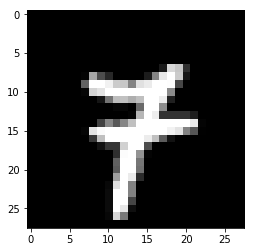

In [12]:
%matplotlib inline
img_batch,pred = sess.run([x,prediction], feed_dict={x:batch_x,y:batch_y})
img = img_batch[0]
img = np.reshape(img,(28,28))
plt.imshow(img, cmap='gray')
print('Raw predictions: {}'.format(pred[0]))
print('Class predicted {}'.format(np.argmax(pred[0])))

Close Session

In [13]:
sess.close()